# Carbon-negative oleochemical production through green hydrogen


![flowsheet](H2_CO2_to_oleochemicals.png)

The open-source biorefineries library includes over 20 biorefinery configurations.

In [1]:
import biosteam as bst
from biorefineries.gas_fermentation import Biorefinery
bst.nbtutorial()
br = Biorefinery()
br

Biorefinery(
    name='all fermentation|glucose growth',
    product='Dodecanol',
    carbon_capture=False,
    dewatering=False,
    glucose_growth=True,
    biomass='cornstover',
    hydrogen_price='all',
    fermentation_performance='all',
    production_capacity='baseline',
)


Let's have a look at the diagram and the key input/outputs of our model.

In [2]:
br.system.show()

System: acetyl_ester_sys
Highest convergence error among components in recycle
stream M603-0 after 3 loops:
- flow rate   7.94e-01 kmol/hr (0.0052%)
- temperature 1.25e-04 K (4.1e-05%)
ins...
[0] hydrogen  
    phase: 'g', T: 298.15 K, P: 1.01325e+06 Pa
    flow (kmol/hr): H2  1.43e+03
outs...
[0] product  
    phase: 'l', T: 317.64 K, P: 202650 Pa
    flow (kmol/hr): Water       3.94e-05
                    AceticAcid  5.71e-10
                    Dodecanol   22.3
                    Hexane      0.0579
                    Glucose     9.82e-09


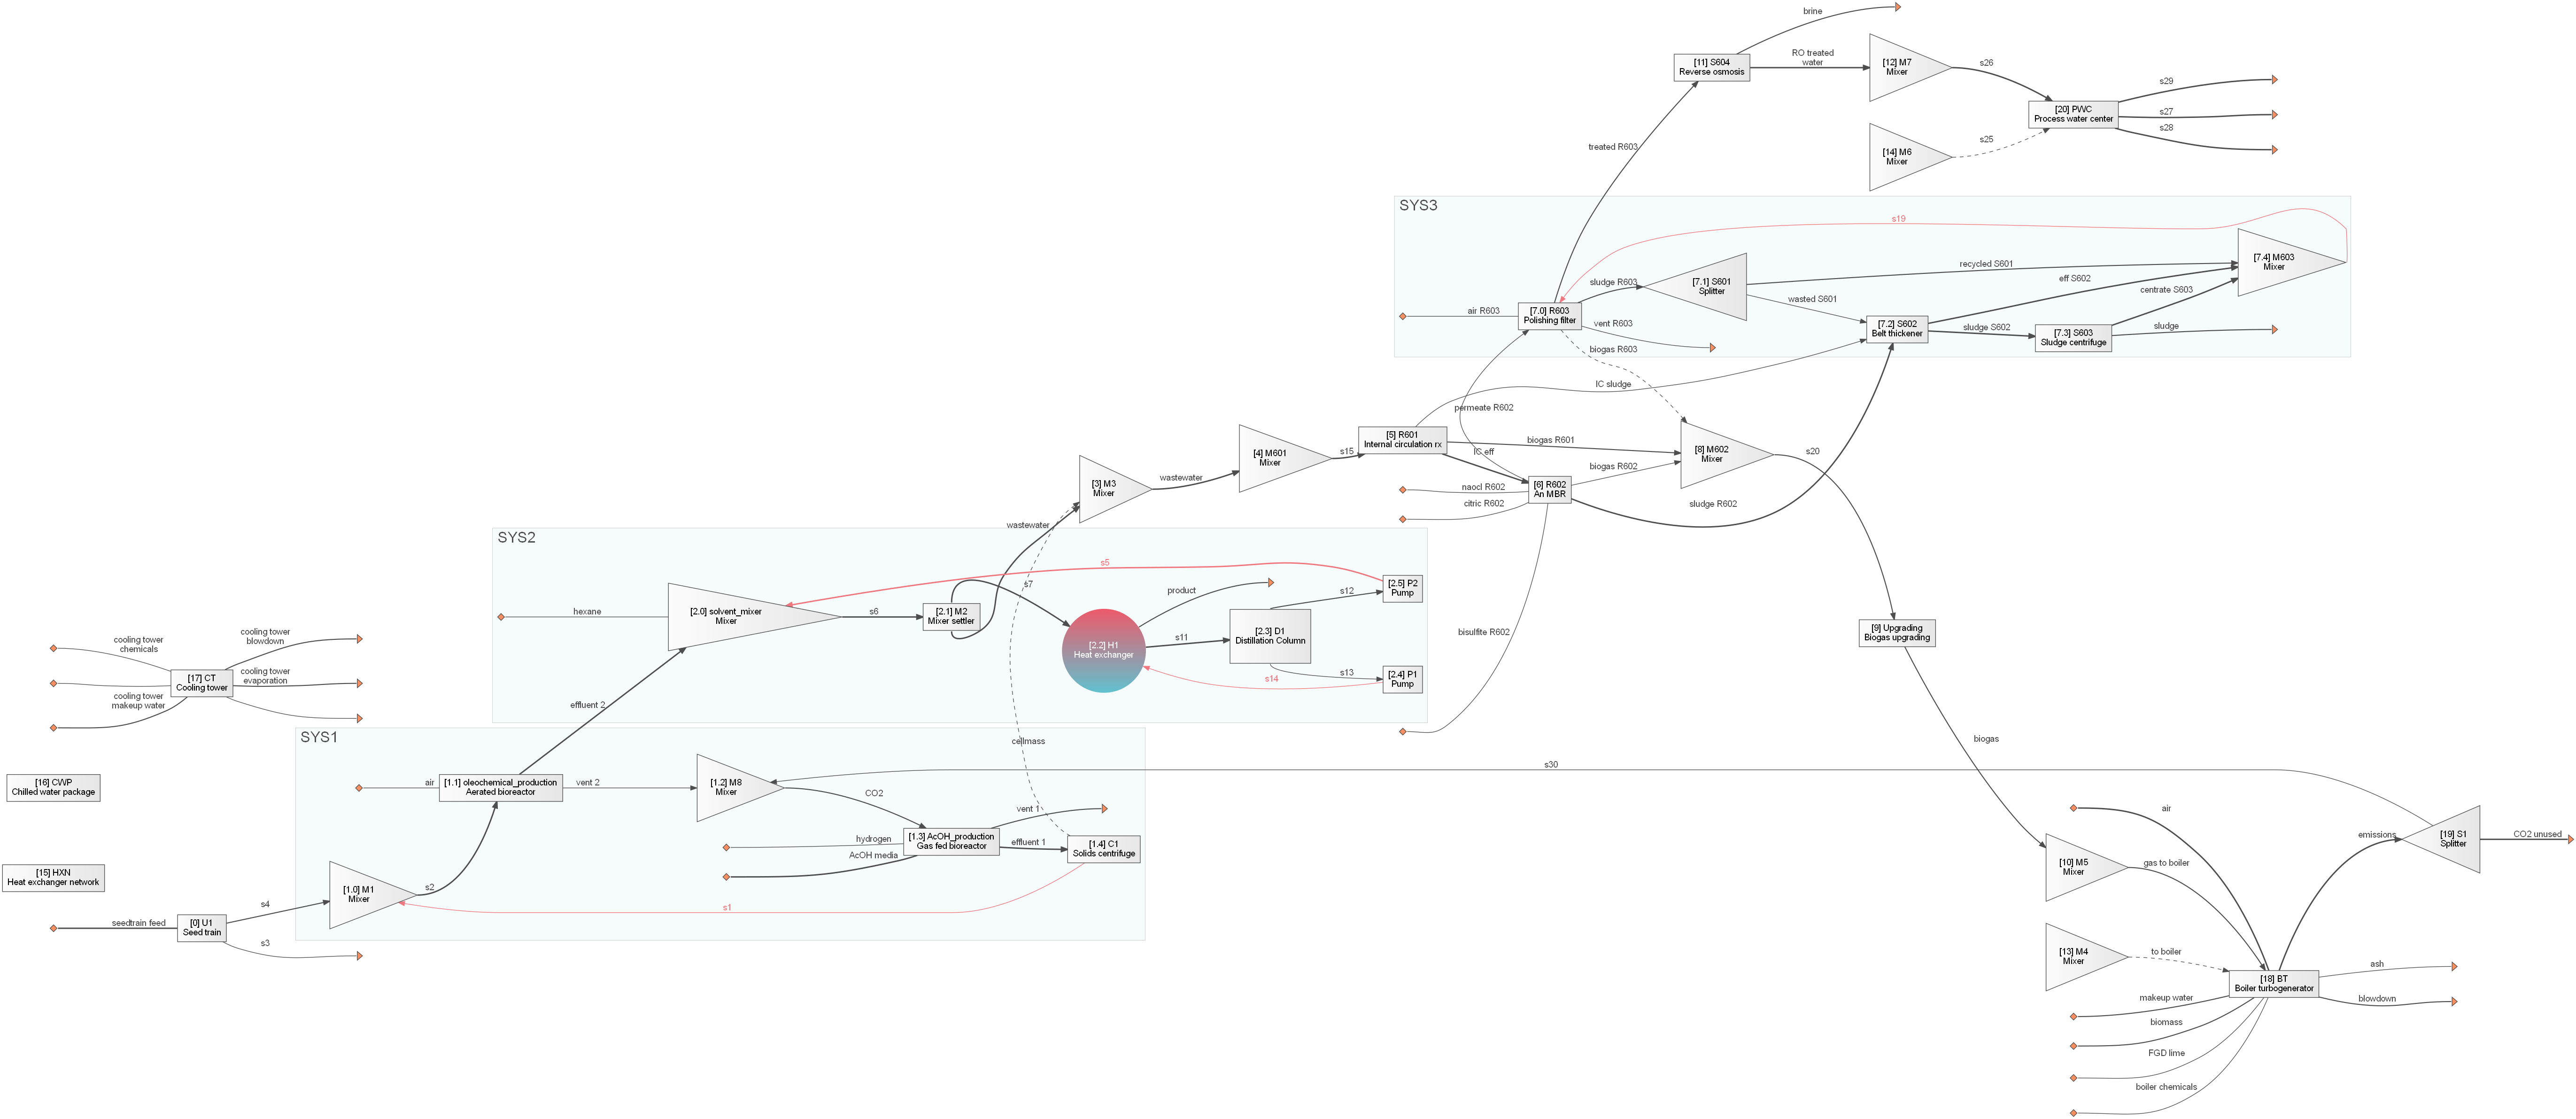

In [3]:
br.system.diagram(format='png', kind='cluster', number=True)

Every unit operation and stream are available as attributes in the model:

In [4]:
br.oleochemical_production.show()

AeratedBioreactor: oleochemical_production
ins...
[0] s2  from  Mixer-M1
    phase: 'l', T: 310.15 K, P: 101325 Pa
    flow (kmol/hr): Water       2.67e+04
                    AceticAcid  309
                    Yeast       365
                    Glucose     28.1
[1] air  
    phase: 'g', T: 310.15 K, P: 101325 Pa
    flow (kmol/hr): N2  1.15e+03
                    O2  305
outs...
[0] vent_2  to  Mixer-M8
    phase: 'g', T: 310.15 K, P: 101325 Pa
    flow (kmol/hr): Water       91.5
                    N2          1.15e+03
                    O2          88.1
                    CO2         351
                    AceticAcid  2.34e-07
[1] effluent_2  to  Mixer-solvent_mixer
    phase: 'l', T: 310.15 K, P: 101325 Pa
    flow (kmol/hr): Water       2.69e+04
                    AceticAcid  0.000108
                    Yeast       365
                    Dodecanol   22.4
                    Glucose     28.1


In [5]:
br.oleochemical_production.results(include_installed_cost=True, basis='SI')

Aerated bioreactor                                              Units oleochemical_production
Electricity              Power                                     kW                9.65e+03
                         Cost                                  USD/hr                     754
Cooling water            Duty                                   kJ/hr               -1.02e+08
                         Flow                                 kmol/hr                1.15e+05
                         Cost                                  USD/hr                    56.2
Design                   Reactor volume                            m³                3.63e+03
                         Batch time                                hr                    17.1
                         Loading time                              hr                    5.71
                         Residence time                            hr                    8.43
                         Vessel type                                                 Vertical
                         Length                                     m                    87.3
                         Diameter                                   m                    7.27
                         Weight                                    kg                2.03e+05
                         Wall thickness                             m                  0.0117
                         Vessel material                                  Stainless steel 316
Purchase cost            Vertical pressure vessel (x3)            USD                   6e+06
                         Platform and ladders (x3)                USD                1.01e+06
                         Compressor - Compressor(s) (x3)          USD                3.51e+06
                         Air cooler - Floating head (x3)          USD                4.12e+04
                         Heat exchanger - Floating head (x3)      USD                1.07e+06
                         Recirculation pump - Pump (x3)           USD                6.94e+05
                         Recirculation pump - Motor (x3)          USD                1.39e+04
                         Agitator - Agitator (x3)                 USD                1.47e+06
Total purchase cost                                               USD                1.38e+07
Installed equipment cost                                          USD                2.95e+07
Utility cost                                                   USD/hr                     811

The process model streamlines simulation, TEA, and LCA through parameters you can modify and system-wide metrics you can compute:

In [6]:
br.model

Model:
parameters: EtAc - Price [USD/kg]
            Hexane - Price [USD/kg]
            Glucose - Price [USD/kg]
            Dodecylacetate - Price [USD/kg]
            H2 - Price [USD/kg]
            AcOH production - Titer [g/L]
            AcOH production - Productivity [g/L/h]
            Oleochemical production - Titer [g/L]
            Oleochemical production - Productivity [g/L/h]
            Oleochemical production - Bioreactor yield [% theoretical]
            Oleochemical production - Specific yield [g_{Dodecanol}/g_{cell}]
            Oleochemical - Production capacity [MT/yr]
            Biomass - Price [USD/MT]
indicators: MSP [USD/kg]
            Carbon intensity [kg*CO2e/kg]
            TCI [10^6 USD]
            Product yield to biomass [wt %]
            Product yield to hydrogen [% theoretical]
            Biomass burned [10^3 MT/yr]
            Hydrogen consumption [10^3 MT/yr]
            Electricity demand [kWh/kg-H2]


In [7]:
assumptions, outcomes = br.baseline()
assumptions

EtAc                    Price [USD/kg]                         1.57
hexane                  Price [USD/kg]                         0.73
glucose                 Price [USD/kg]                        0.413
dodecylacetate          Price [USD/kg]                            3
H2                      Price [USD/kg]                            3
AcOH production         Titer [g/L]                              60
                        Productivity [g/L/h]                    1.5
Oleochemical production Titer [g/L]                              30
                        Productivity [g/L/h]                      1
                        Bioreactor yield [% theoretical]         65
                        Specific yield [g_{Dodecanol}/g_...     3.5
oleochemical            Production capacity [MT/yr]         3.5e+04
biomass                 Price [USD/MT]                         54.7

In [8]:
outcomes

- MSP [USD/kg]                         5.46
  Carbon intensity [kg*CO2e/kg]        2.44
  TCI [10^6 USD]                        328
  Product yield to biomass [wt %]     0.546
  Product yield to hydrogen [% the... 0.202
  Biomass burned [10^3 MT/yr]          64.1
  Hydrogen consumption [10^3 MT/yr]    24.3
  Electricity demand [kWh/kg-H2]       6.08